# ML. Практика 1. Градиентный спуск
### (по нескольким признакам)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def compute_hypothesis(X, theta):
    return X @ theta

In [3]:
def compute_cost(X, y, theta):
    m = X.shape[0]  # количество примеров в выборке
    return 1 / (2 * m) * np.sum((compute_hypothesis(X, theta) - y) ** 2)

### Градиентный спуск:
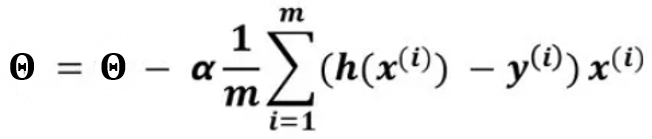

In [4]:
def gradient_descend(X, y, theta, alpha, num_iter):
    history = list()
    m = X.shape[0]  # количество примеров в выборке
    # n = X.shape[1]  # количество признаков с фиктивным
    for i in range(num_iter):
        theta_temp = theta.copy()
        theta_temp = theta_temp - alpha * (compute_hypothesis(X, theta) - y).dot(X) / m
        theta = theta_temp

        history.append(compute_cost(X, y, theta))
    return history, theta

In [5]:
def scale_features(X):
    m = X.shape[0]  # количество примеров в выборке

    mj = np.sum(X, axis=0) / m  # мат ожидание
    sigma = np.sqrt(1 / (m - 1) * np.sum((X - mj) ** 2, axis=0))  # ско

    X_0 = X[:, 0]
    X_0 = X_0[:, np.newaxis]  # приведение к вектору-столбцу

    return np.concatenate([X_0, np.divide((X[:, 1:] - mj[1:]), sigma[1:])], axis=1)

In [6]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [7]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [8]:
X, y = load_data('lab1data2.txt')

In [9]:
history, theta = gradient_descend(X, y, np.array([0, 0, 0], float), 0.01, 1500)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_4052/3171468777.py:3: RuntimeWarning: overflow encountered in square
  return 1 / (2 * m) * np.sum((compute_hypothesis(X, theta) - y) ** 2)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_4052/3636754848.py:7: RuntimeWarning: invalid value encountered in subtract
  theta_temp = theta_temp - alpha * (compute_hypothesis(X, theta) - y).dot(X) / m


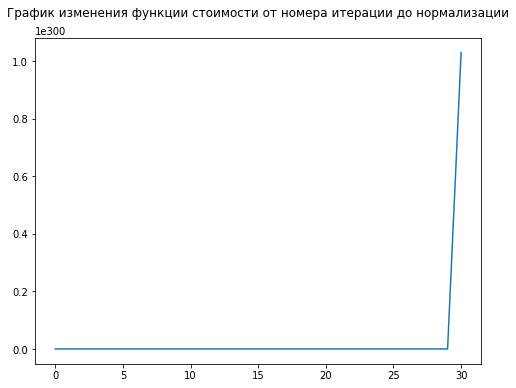

In [10]:
plt.figure(figsize=(8, 6))
plt.title('График изменения функции стоимости от номера итерации до нормализации\n')
plt.plot(range(len(history)), history)
plt.show()

### Нормализация признаков
Среднее африфм. одного признака: 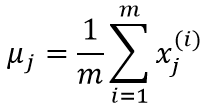
СКО одного признака: 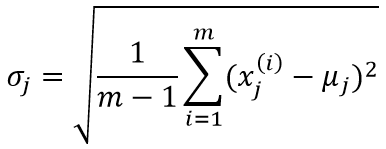
Нормализованные значения: 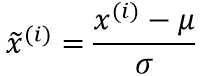

In [11]:
X = scale_features(X)

In [12]:
# после нормализации
history, theta = gradient_descend(X, y, np.array([0, 0, 0], float), 0.01, 1500)

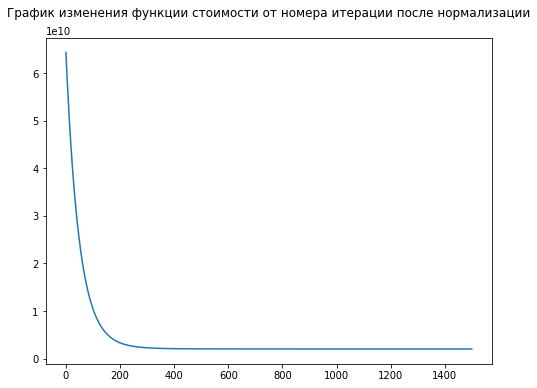

In [13]:
plt.figure(figsize=(8, 6))
plt.title('График изменения функции стоимости от номера итерации после нормализации\n')
plt.plot(range(len(history)), history)
plt.show()

### Theta по градиентному спуску VS theta по формуле:
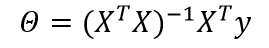

In [15]:
theta_solution = normal_equation(X, y)
print(f'theta, посчитанные через градиентный спуск: {np.round(theta, 3)},\n'
      f'theta через через нормальное уравнение:     {np.round(theta_solution, 3)}')

theta, посчитанные через градиентный спуск: [340412.563 110540.567  -6558.991],
theta через через нормальное уравнение:     [340412.66  110631.05   -6649.474]
